<a href="https://colab.research.google.com/github/ML-ctrl/Thesis-ML_2022/blob/main/NLP_Calenda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
warnings.filterwarnings("ignore", category=DeprecationWarning)
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import re
import matplotlib.pyplot as plt

In [ ]:
import gdown

# Download the file using gdown
url = "https://drive.google.com/uc?id=1Oh2KZXteF4FyhDO7YXi3X0kOn-yOY_5z"
output = 'Calenda_posts.xlsx'
gdown.download(url, output, quiet=False)

# Read the downloaded Excel file into a Pandas DataFrame
df = pd.read_excel(output, header=0, names=['text', 'id', 'url'])

# Display the first few rows of the DataFrame to understand what it looks like
print(df.head())

Downloading...
From: https://drive.google.com/uc?id=1Oh2KZXteF4FyhDO7YXi3X0kOn-yOY_5z
To: /content/Calenda_posts.xlsx
100%|██████████| 34.5k/34.5k [00:00<00:00, 27.6MB/s]


                                                text                   id  \
0  Bonomi ha ragione. È incredibile il fatto che ...  3322110098234972018   
1  Parlare ad ogni elezione di “vento che cambia”...  3321294674173990657   
2  Il Patto repubblicano. \n\n1) Stati Uniti d’Eu...  3260379198833313961   
3  Abbiamo analizzato il “maestrale” della Sardeg...  3321984442625111754   
4  Duro monito di Giorgia Meloni al Governo di Gi...  3322159760480608203   

                                        url  
0  https://www.instagram.com/p/C4agYh2CJdy/  
1  https://www.instagram.com/p/C4Xm-jAiZcB/  
2  https://www.instagram.com/p/C0_MZtriEip/  
3  https://www.instagram.com/p/C4aDz_8CzbK/  
4  https://www.instagram.com/p/C4arrNaix_L/  


In [ ]:
corpus = df['text'].tolist()
print(corpus)

['Bonomi ha ragione. È incredibile il fatto che mentre in tutto il mondo si varano piani di stimolo per gli investimenti, qui, pur avendo i soldi non si riesce a farlo. Dall’esordio dell’Esecutivo abbiamo mandato norma e piani per varare industria 5.0. E siamo ancora a zero.', 'Parlare ad ogni elezione di “vento che cambia” è un clamoroso autogol. Le elezioni in Abruzzo confermano che l’elettorato di opinione non va a votare alle regionali. È un dato drammatico che menoma la democrazia.\n\nTrovate le mie considerazioni sul risultato abruzzese nella mia ultima newsletter: link nelle storie.', 'Il Patto repubblicano. \n\n1) Stati Uniti d’Europa a partire dal nucleo dei paesi fondatori. \n2) Atlantismo e rispetto degli accordi NATO sul 2% per le spese della difesa. Riaprire accordo libero scambio con USA.\n3) Spostamento della spesa corrente su istruzione e sanità \n4) Revisione del modello di contrattazione nazionale e salario minimo \n5) Uscita dello Stato e delle amministrazioni locali

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Since my data is in Italian, I will use the Italian stopwords provided by nltk, but I will also add my additional stopwords
stop_words = set(stopwords.words('italian'))
# Additional stop words
additional_stopwords = {"il", "f", "o", "si", "fino" "mettere", "portare", "così", "senza", "os", "da", "d", "fa", "oggi", "fatto", "essere", "solo", "cose"}

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def nltk_clean_text(text):
    if isinstance(text, list):
        text = ' '.join(text)

    # Tokenize and lemmatize, remove stop words and non-alphabetic tokens
    tokens = word_tokenize(str(text).lower())  # Lowercasing text and converting to string
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token.isalpha()]
    # Explicitly filtering additional stopwords
    filtered_tokens = [token for token in filtered_tokens if token not in additional_stopwords]
    return ' '.join(filtered_tokens)

df['nltk_cleaned_text'] = df['text'].apply(nltk_clean_text)

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,text,id,url,nltk_cleaned_text
0,Bonomi ha ragione. È incredibile il fatto che ...,3322110098234972018,https://www.instagram.com/p/C4agYh2CJdy/,bonomi ragione incredibile mentre mondo varano...
1,Parlare ad ogni elezione di “vento che cambia”...,3321294674173990657,https://www.instagram.com/p/C4Xm-jAiZcB/,parlare ogni elezione vento cambium clamoroso ...
2,Il Patto repubblicano. \n\n1) Stati Uniti d’Eu...,3260379198833313961,https://www.instagram.com/p/C0_MZtriEip/,patto repubblicano stati uniti europa partire ...
3,Abbiamo analizzato il “maestrale” della Sardeg...,3321984442625111754,https://www.instagram.com/p/C4aDz_8CzbK/,analizzato maestrale sardegna analizza scirocc...
4,Duro monito di Giorgia Meloni al Governo di Gi...,3322159760480608203,https://www.instagram.com/p/C4arrNaix_L/,duro monito giorgia meloni governo giorgia mel...


In [ ]:
#Word frequency
word_freq = df['nltk_cleaned_text'].apply(lambda x: x.split()).explode().value_counts()

print(word_freq)

nltk_cleaned_text
politica      27
putin         26
libertà       18
italia        18
governo       17
              ..
triste         1
conoscerla     1
romana         1
luoghi         1
cucca          1
Name: count, Length: 2148, dtype: int64


<ipython-input-8-44d2e070182a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='freq', y='term', data=word_freq_df.head(top_n), palette='viridis')


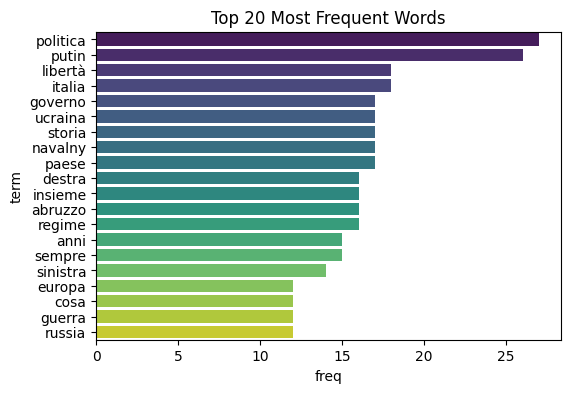

In [ ]:
# Converting the Series to a DataFrame
word_freq_df = word_freq.to_frame().reset_index()
word_freq_df.columns = ['term','freq']
word_freq_df.head()

import seaborn as sns
import matplotlib.pyplot as plt

top_n = 20
plt.figure(figsize=(6, 4))
sns.barplot(x='freq', y='term', data=word_freq_df.head(top_n), palette='viridis')

plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('freq')
plt.ylabel('term')

plt.show()

In [ ]:
data = df.text.values.tolist()

if False:
    df['nltk_clean_data'] = df['text'].str.replace("&#039;", "'", regex=False)
    # Remove Emails
    data = [re.sub(r'\S*@\S*\s?', '', str(sent)) for sent in data]
    # Remove new line characters
    data = [re.sub(r'\s+', ' ', str(sent)) for sent in data]
    # Remove distracting single quotes
    data = [re.sub(r"\'", "", str(sent)) for sent in data]

In [ ]:
import spacy
!python -m spacy download it_core_news_sm
nlp = spacy.load('it_core_news_sm')

def lemmatization(data):
    texts_out = []
    for text in data:
        # Check if the text is not NaN (float) and is a string
        if isinstance(text, str):
            doc = nlp(text)
            lemmatized_text = " ".join([token.lemma_ for token in doc])
            texts_out.append(lemmatized_text)
    return texts_out

lemmatized_texts = lemmatization(data)

def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 54.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


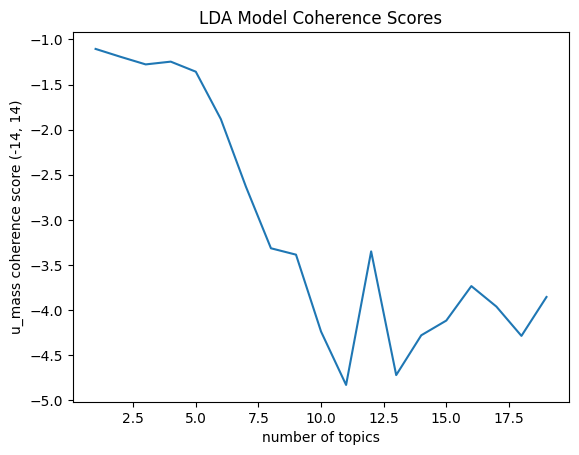

In [ ]:
topics = []
score = []

for i in range(1,20,1):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=i, iterations=10, passes=10, random_state=50)
  cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
  topics.append(i)
  score.append(cm.get_coherence())

plt.plot(topics, score)
plt.xlabel('number of topics')
plt.ylabel('u_mass coherence score (-14, 14)')
plt.title('LDA Model Coherence Scores')
plt.show()

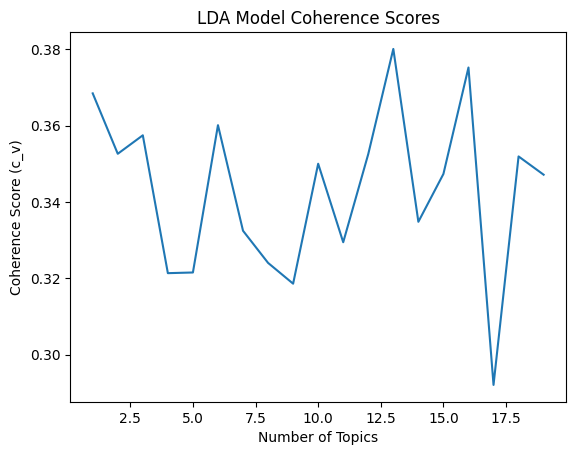

In [ ]:
topics = []
score = []

for i in range(1, 20, 1):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=i, iterations=10, passes=10, random_state=50)
    cm = CoherenceModel(model=lda_model, texts=data_words, corpus=corpus, dictionary=id2word, coherence='c_v')
    topics.append(i)
    score.append(cm.get_coherence())

plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (c_v)')
plt.title('LDA Model Coherence Scores')
plt.show()

In c_v metric, the maximum value indicates the optimal topic coherence, while in the case of u_mass metric, the value close to zero indicates the highest coherence. When it comes to choosing the best coherence score, one solution is to implement the elbow technique. Usually, the coherence score will increase with the increase in the number of topics. This increase will become smaller as the number of topics gets higher. The trade-off between the number of topics and coherence score can be achieved using the elbow technique. Following Khalid and Wade (2020) "the elbow method helps the interpretation and validation of consistency within-cluster analysis and select the optimal number of clusters by fitting the model with a range of values of K". In other words, applied to my case it consists in the idea that one should choose a number of topic so that adding another topic doesn't give much better coherence score. Usign this technique I individuated the same number of topic with both u_mass and c_v topic coherences: 6.

In [ ]:
import gensim
from gensim import corpora

# Tokenize the text
tokenized_text = df['nltk_cleaned_text'].apply(lambda x: x.split())

# Create a dictionary from the tokenized text
dictionary = corpora.Dictionary(tokenized_text)

# Create a corpus (bag of words) from the tokenized text
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Define the number of topics base on LDA models
num_topics = 6

# Train the LDA model using the tokenized and bag-of-words formatted corpus
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=10, passes=10, random_state=100)

# Print topics
for topic in lda_model.print_topics():
    print(topic)

(0, '0.009*"libertà" + 0.006*"navalny" + 0.006*"storia" + 0.005*"politica" + 0.005*"russia" + 0.005*"pericoloso" + 0.004*"viva" + 0.004*"anni" + 0.004*"italia" + 0.004*"sempre"')
(1, '0.007*"governo" + 0.006*"conte" + 0.005*"meloni" + 0.005*"quando" + 0.005*"politica" + 0.005*"abruzzo" + 0.004*"sinistra" + 0.004*"destra" + 0.003*"ore" + 0.003*"italia"')
(2, '0.012*"regime" + 0.007*"putin" + 0.007*"destra" + 0.005*"governo" + 0.005*"paese" + 0.004*"sinistra" + 0.003*"italia" + 0.003*"politica" + 0.003*"parole" + 0.003*"politico"')
(3, '0.007*"abruzzo" + 0.006*"insieme" + 0.006*"guerra" + 0.005*"putin" + 0.005*"anni" + 0.005*"ucraina" + 0.005*"destra" + 0.004*"sempre" + 0.004*"politica" + 0.004*"storie"')
(4, '0.009*"putin" + 0.007*"dopo" + 0.006*"libertà" + 0.006*"cosa" + 0.006*"bisogno" + 0.005*"storia" + 0.005*"ciò" + 0.005*"navalny" + 0.005*"ucraina" + 0.005*"tosta"')
(5, '0.009*"politica" + 0.005*"libertà" + 0.005*"stato" + 0.005*"cittadini" + 0.005*"paese" + 0.005*"piazza" + 0.004*

In [ ]:
# topic modeling plotting tools
!pip install -q pyLDAvis
import pyLDAvis
import pyLDAvis.gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.8 MB/s eta 0:00:00


In [ ]:
# Visualize the topics
#pyLDAvis.enable_notebook()
!pip install pandas==2.0.3 #To visualize the topics it is necessary to disinstall pandas 2.1.4 and instead install pandas 2.0.0

# Prepare the visualization
vis_data = pyLDAvis.gensim.prepare(lda_model,corpus, dictionary=lda_model.id2word)

# Display the visualization
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Firstly, I decided to test how the mode MMilaNLProc/feel-it-italian-sentiment performed in classifying sentiment. I tried it with a dataset of negative and positive reviews and then performed a confusion matrix to see how well it predicted sentiments.

In [ ]:

!pip install -q transformers
!gdown https://drive.google.com/uc?id=10Z0dmx_3Ruq1FxVyMsB76NPHEApL-u3Z

fp = "sentiment.xlsx"
test_df = pd.read_excel(fp, header=None, names=['id','text', "sentiment"])
test_df.head()
print(test_df)
from transformers import pipeline

classifier = pipeline("text-classification",model='MilaNLProc/feel-it-italian-sentiment',top_k=2)
prediction = classifier("Oggi sono proprio contento!")
print(prediction)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://drive.google.com/uc?id=10Z0dmx_3Ruq1FxVyMsB76NPHEApL-u3Z
To: /content/sentiment.xlsx
100% 55.7k/55.7k [00:00<00:00, 64.5MB/s]
    id                                               text  sentiment
0    0  Questo è stato un interessante e piena di sera...          1
1    1  Ottimo e ben organizzato. Nessuna coda all'ent...          1
2    3  Sconsiglio di visitarlo, è sopravvalutato e tr...          0
3    4  La vista del duomo all'uscita della metro non ...          0
4    5  Vivo a Milano da una vita ma non avevo mai tro...          1
5    6  Tenuto abbastanza bene, ma difficilmente acces...          0
6    8  Non ci sono parole per descrivere la bellezza ...          1
7    9  Un polmone verde in una grande città, uno dei ...          1
8   10  Visitare Milano nel periodo di Natale e' molto...          0
9   11  Bruttissimo in questa stagione , abbiamo girat...          0
10  12  E' una delle attrazioni più importanti da vede...          1
11  13  Quando si

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/847 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/794k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/299 [00:00<?, ?B/s]

[[{'label': 'positive', 'score': 0.9997411370277405}, {'label': 'negative', 'score': 0.00025880170869641006}]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


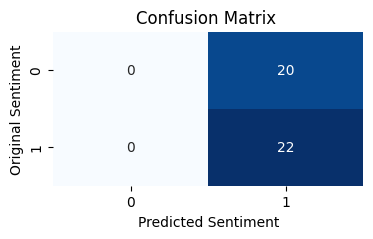

In [ ]:
from transformers import pipeline
from sklearn.metrics import confusion_matrix

# sentiment analysis model
model_name = "MilaNLProc/feel-it-italian-sentiment"

# sentiment analysis pipeline
nlp = pipeline("text-classification", model=model_name)

# predict sentiment on the original unaltered texts
test_df['HuggingFace Prediction'] = test_df['text'].apply(lambda text: nlp(text)[0])

# predicted sentiment labels from the pipeline results and convert to 0 (negative) or 1 (positive)
test_df['HuggingFace Confidence'] = test_df['HuggingFace Prediction'].apply(lambda prediction: prediction['score'])
test_df['HuggingFace Prediction'] = test_df['HuggingFace Prediction'].apply(lambda prediction: 0 if prediction['label'] == 'NEGATIVE' else 1)

# confusion matrix
conf_matrix = confusion_matrix(test_df['sentiment'], test_df['HuggingFace Prediction'])

# plot the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Sentiment")
plt.ylabel("Original Sentiment")
plt.title("Confusion Matrix ")
plt.show()

The model MilaNLProc/feel-it-italian-sentiment, based on the above Matrix did not perform particularly well in predicting sentiments, so I decided to test another model: osiria/bert-tweet-italian-uncased-sentiment, with the same review dataset.

In [ ]:
from transformers import BertTokenizerFast, BertForSequenceClassification, pipeline

tokenizer = BertTokenizerFast.from_pretrained("osiria/bert-tweet-italian-uncased-sentiment")
model = BertForSequenceClassification.from_pretrained("osiria/bert-tweet-italian-uncased-sentiment")
classifier = pipeline("text-classification", model = model, tokenizer = tokenizer)

classifier("una fantastica giornata di #calcio! grande prestazione del mister e della squadra")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tokenizer_config.json:   0%|          | 0.00/446 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/206k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/441M [00:00<?, ?B/s]

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


[{'label': 'POSITIVE', 'score': 0.9883694648742676}]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


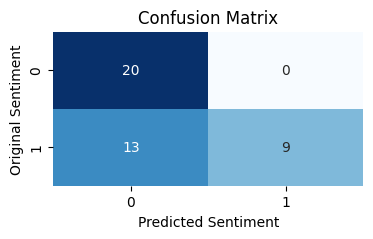

In [ ]:
from transformers import pipeline
from sklearn.metrics import confusion_matrix

# sentiment analysis model
model_name = "osiria/bert-tweet-italian-uncased-sentiment"

# sentiment analysis pipeline with model
nlp = pipeline("text-classification", model=model_name)

# predict sentiment on the original unaltered texts
test_df['HuggingFace Prediction'] = test_df['text'].apply(lambda text: nlp(text)[0])

# extract the predicted sentiment labels from the pipeline results and convert to 0 (negative) or 1 (positive)
test_df['HuggingFace Confidence'] = test_df['HuggingFace Prediction'].apply(lambda prediction: prediction['score'])
test_df['HuggingFace Prediction'] = test_df['HuggingFace Prediction'].apply(lambda prediction: 0 if prediction['label'] == 'NEGATIVE' else 1)

# confusion matrix
conf_matrix = confusion_matrix(test_df['sentiment'], test_df['HuggingFace Prediction'])

# plot the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Sentiment")
plt.ylabel("Original Sentiment")
plt.title("Confusion Matrix")
plt.show()

Since this model, as seen in the above matrix, performed a lot better, I decided to use in my sentiment analysis of Calenda's Instagram captions.

In [ ]:
# Use the pipeline to predict sentiment on my own dataset
df['hf_nlp'] = df['nltk_cleaned_text'].apply(lambda text: nlp(text)[0])

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,id,url,nltk_cleaned_text,hf_nlp
0,Bonomi ha ragione. È incredibile il fatto che ...,3322110098234972018,https://www.instagram.com/p/C4agYh2CJdy/,bonomi ragione incredibile mentre mondo varano...,"{'label': 'NEGATIVE', 'score': 0.9977622032165..."
1,Parlare ad ogni elezione di “vento che cambia”...,3321294674173990657,https://www.instagram.com/p/C4Xm-jAiZcB/,parlare ogni elezione vento cambium clamoroso ...,"{'label': 'NEGATIVE', 'score': 0.9961727261543..."
2,Il Patto repubblicano. \n\n1) Stati Uniti d’Eu...,3260379198833313961,https://www.instagram.com/p/C0_MZtriEip/,patto repubblicano stati uniti europa partire ...,"{'label': 'POSITIVE', 'score': 0.5529724359512..."
3,Abbiamo analizzato il “maestrale” della Sardeg...,3321984442625111754,https://www.instagram.com/p/C4aDz_8CzbK/,analizzato maestrale sardegna analizza scirocc...,"{'label': 'NEGATIVE', 'score': 0.640614926815033}"
4,Duro monito di Giorgia Meloni al Governo di Gi...,3322159760480608203,https://www.instagram.com/p/C4arrNaix_L/,duro monito giorgia meloni governo giorgia mel...,"{'label': 'NEGATIVE', 'score': 0.8012603521347..."


In [ ]:
# Extract the predicted sentiment labels from the pipeline results and convert to 0 (negative) or 1 (positive)
df['hf_prediction'] = df['hf_nlp'].apply(lambda prediction: 0 if prediction['label'] == 'NEGATIVE' else 1)
df['hf_confidence'] = df['hf_nlp'].apply(lambda prediction: prediction['score'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Get the mean of the prediction
df.hf_prediction.mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.18666666666666668

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-23-b447d46a26d6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


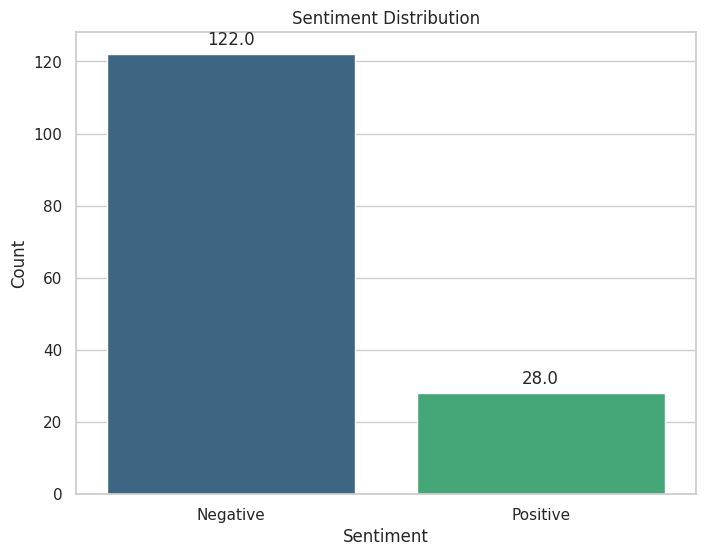

In [ ]:
#Visualization of te sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment
sentiment_counts = df['hf_prediction'].value_counts()

# Map numerical values to string labels
sentiment_mapping = {0: 'Negative', 1: 'Positive'}
sentiment_counts.index = sentiment_counts.index.map(sentiment_mapping)

# Plot the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Set labels and title
ax.set(xlabel='Sentiment', ylabel='Count', title='Sentiment Distribution')

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

Below there is the Chi-squared text of the differnce in the distribuitons of sentiments between the Calenda and Salvini.

In [ ]:
from scipy.stats import chi2_contingency

# Observed frequencies
observed = [[122, 28], [94, 56]]

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(observed)

# Print results
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

# Compare with significance level (e.g., 0.05)
alpha = 0.05
if p < alpha:
    print("Reject null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the distributions.")


Chi-squared statistic: 12.053571428571429
P-value: 0.0005169324744640473
Degrees of freedom: 1
Expected frequencies:
[[108.  42.]
 [108.  42.]]
Reject null hypothesis: There is a significant difference between the distributions.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


To further investigate the possible relationship between the politician and the sentiment of their posts, I performed the follwing logistic regression.

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Create a DataFrame with the data
data = {
    'Politician': [1]*130 + [2]*150,  # 1 for Salvini, 2 for Calenda
    'Sentiment': [1]*94 + [0]*36 + [1]*122 + [0]*28  # 1 for negative, 0 for positive
}

df = pd.DataFrame(data)

# Define the independent and dependent variables
X = df['Politician']
y = df['Sentiment']

# Add intercept term
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the model
print(result.summary())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Optimization terminated successfully.
         Current function value: 0.531807
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Sentiment   No. Observations:                  280
Model:                          Logit   Df Residuals:                      278
Method:                           MLE   Df Model:                            1
Date:                Wed, 29 May 2024   Pseudo R-squ.:                 0.01067
Time:                        18:58:11   Log-Likelihood:                -148.91
converged:                       True   LL-Null:                       -150.51
Covariance Type:            nonrobust   LLR p-value:                   0.07307
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4477      0.444      1.007      0.314      -0.423       1.319
Politician     0.5120      0.